In [1]:
print ("")
print ("Developed by:")
print ("++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+")
print ("+  ___        ___         ___          _          _     ________           ___          _________         -")
print ("+ |   \      /   |       / _ \        | |        | |   |  ____  \         / _ \        |  ______ \        +")
print ("- | |\ \    / /  |      / /-\ \       | |________| |   | |____|  |       / /_\ \       | |      \ \        ")
print ("+ | | \ \  / / | |     / _____ \      |  ________  |   |  ____  /       / _____ \      | |      | |       +")
print ("- | |  \ \/ /  | |    / /     \ \     | |        | |   | |    \ \      / /     \ \     | |______/ /        ")
print ("+ |_|   \__/   |_|   /_/       \_\    |_|        |_|   | |     \_\    /_/       \_\    |_________/        +")
print ("-                                                                                                         -")
print ("++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+")
print ("")


Developed by:
++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+
+  ___        ___         ___          _          _     ________           ___          _________         -
+ |   \      /   |       / _ \        | |        | |   |  ____  \         / _ \        |  ______ \        +
- | |\ \    / /  |      / /-\ \       | |________| |   | |____|  |       / /_\ \       | |      \ \        
+ | | \ \  / / | |     / _____ \      |  ________  |   |  ____  /       / _____ \      | |      | |       +
- | |  \ \/ /  | |    / /     \ \     | |        | |   | |    \ \      / /     \ \     | |______/ /        
+ |_|   \__/   |_|   /_/       \_\    |_|        |_|   | |     \_\    /_/       \_\    |_________/        +
-                                                                                                         -
++++++---++++++++++++---++++++++++++---++++++++++++---++++---++++++++++++---++++++++++++---++++++++++++---+



In [43]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [44]:
#خلاصه کردن اندازه رکوردھا# 
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [45]:
#مشخص کردن تعداد کلاس ھا #
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [46]:
#مشخص کردن تعداد لغات منحصر بفرد #
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


(میانگین طول نظرات (از چند واژه در ھر نظر استفاده شده است

Review length: 
Mean 234.76 words (172.911495)


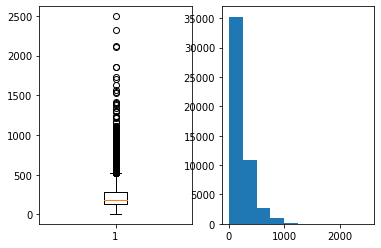

In [47]:
#محاسبه میانگین و انحراف استاندارد نظرات #
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
#رسم طول نظرات با نمودارھای جعبه ای و ھیستاگرام #
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

ساخت مدل شبکھ عصبی ( 2 MLP

In [48]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [49]:
seed = 7
numpy.random.seed(seed)

In [50]:
#Only Load the Top 5,000 words in the IMDB Review.
imdb.load_data(num_words=5000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\mr.true\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\mr.true\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [51]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [52]:
#The output of this first layer would be a matrix with the size 32 * 500 for
Embedding(5000, 32, input_length=500)

In [53]:
# استفاده از # MLP برای حل مسئله IMDB
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# برای حفظ اعتبار مدل #
seed = 7
numpy.random.seed(seed)
# با کار واژگان برتر #
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
196/196 [==============================] - 15s 71ms/step - loss: 0.5927 - accuracy: 0.6411 - val_loss: 0.3095 - val_accuracy: 0.8674
Epoch 2/2
196/196 [==============================] - 16s 84ms/step - loss: 0.1687 - accuracy:

ساخت مدل شبکھ عصبی کانولوشنی یک بعدی

In [54]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Load, Split and Pad IMDB Dataset

In [55]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [56]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length= max_words))
model.add(Convolution1D(filters=32, kernel_size=3, padding= 'same' ,activation= 'relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

In [57]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 500, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               2000250   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
___________________________________________

In [58]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=1)

Epoch 1/2
196/196 [==============================] - 23s 115ms/step - loss: 0.6263 - accuracy: 0.5987 - val_loss: 0.2825 - val_accuracy: 0.8812
Epoch 2/2
196/196 [==============================] - 22s 110ms/step - loss: 0.2313 - accuracy: 0.9111 - val_loss: 0.2695 - val_accuracy: 0.8892


In [59]:
#Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.92%
